In [ ]:
#  AIML-2 : Data Munging and Data Wrangling

In [4]:
import pandas as pd
df = pd.read_csv('airline.csv')

In [5]:
df.head(10)

,PassengerID,CompletedTrip,CabinClass,TravelerName,Gender,AgeYears,FamilyOnBoard,Guardians,BoardingPassNumber,TicketCost,SuiteNumber,BoardingPort
0,1,0,Economy,Passenger_0,male,22.0,1,0,BP93225,7.25,NaN,ORD
1,2,1,First,Passenger_1,female,NaN,1,0,BP98731,71.28,Suite 232,JFK
2,3,1,Economy,Passenger_2,female,26.0,0,0,BP75445,7.92,NaN,ORD
3,4,1,First,Passenger_3,female,35.0,1,0,BP11329,53.10,Suite 127,ORD
4,5,0,Economy,Passenger_4,male,35.0,0,0,BP49939,8.05,NaN,ORD
5,6,0,Economy,Passenger_5,male,27.0,0,0,BP53061,8.46,NaN,LAX
6,7,0,First,Passenger_6,male,NaN,0,0,BP28292,51.86,Suite 289,ORD
7,8,1,Economy,Passenger_7,female,NaN,1,1,BP66454,16.70,NaN,ORD
8,9,0,Business,Passenger_8,female,58.0,0,0,BP37379,26.55,NaN,ORD


In [6]:
#CHECKING MISSING VALUES
df.isnull()

,PassengerID,CompletedTrip,CabinClass,TravelerName,Gender,AgeYears,FamilyOnBoard,Guardians,BoardingPassNumber,TicketCost,SuiteNumber,BoardingPort
0,False,False,False,False,False,False,False,False,False,False,True,False
1,False,False,False,False,False,True,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,True,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,True,False
5,False,False,False,False,False,False,False,False,False,False,True,False
6,False,False,False,False,False,True,False,False,False,False,False,False
7,False,False,False,False,False,True,False,False,False,False,True,False
8,False,False,False,False,False,False,False,False,False,False,True,False
9,False,False,False,False,False,False,False,False,False,False,True,False


In [7]:
df.isnull().sum()

PassengerID           0
CompletedTrip         0
CabinClass            0
TravelerName          0
Gender                0
AgeYears              3
FamilyOnBoard         0
Guardians             0
BoardingPassNumber    0
TicketCost            0
SuiteNumber           7
BoardingPort          0
dtype: int64

In [8]:
# Fill missing 'AgeYears' values with the mean age
df['AgeYears'].fillna(df['AgeYears'].mean(), inplace=False)

0    22.000000
1    34.571429
2    26.000000
3    35.000000
4    35.000000
5    27.000000
6    34.571429
7    34.571429
8    58.000000
9    39.000000
Name: AgeYears, dtype: float64

In [11]:
# fill missing 'SuiteNumber' values with the most common value
df['SuiteNumber'].fillna(df['SuiteNumber'].mode() [0], inplace=False)
print(df)

df.isnull().sum()

   PassengerID  CompletedTrip CabinClass TravelerName  Gender   AgeYears  \
0            1              0    Economy  Passenger_0    male  22.000000   
1            2              1      First  Passenger_1  female  34.571429   
2            3              1    Economy  Passenger_2  female  26.000000   
3            4              1      First  Passenger_3  female  35.000000   
4            5              0    Economy  Passenger_4    male  35.000000   
5            6              0    Economy  Passenger_5    male  27.000000   
6            7              0      First  Passenger_6    male  34.571429   
7            8              1    Economy  Passenger_7  female  34.571429   
8            9              0   Business  Passenger_8  female  58.000000   
9           10              1    Economy  Passenger_9    male  39.000000   

   FamilyOnBoard  Guardians BoardingPassNumber  TicketCost SuiteNumber  \
0              1          0            BP93225        7.25         NaN   
1              

PassengerID           0
CompletedTrip         0
CabinClass            0
TravelerName          0
Gender                0
AgeYears              0
FamilyOnBoard         0
Guardians             0
BoardingPassNumber    0
TicketCost            0
SuiteNumber           7
BoardingPort          0
dtype: int64

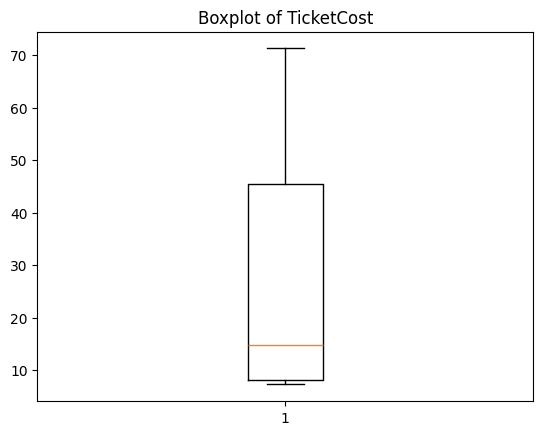

In [13]:
import matplotlib.pyplot as plt

# remove outliers in "TicketCost" usig boxplot
plt.boxplot(df['TicketCost'])
plt.title('Boxplot of TicketCost')
plt.show()

# remove outliers using z-score method
df['TicketCost_zscore'] = (df['TicketCost']- df['TicketCost'].mean()) / df ['TicketCost'].std()
df_no_outliers = df [df['TicketCost_zscore'].abs() < 3]

# Drop z-score column after removing outliers
df_no_outliers.drop(columns=['TicketCost_zscore'], inplace=True)

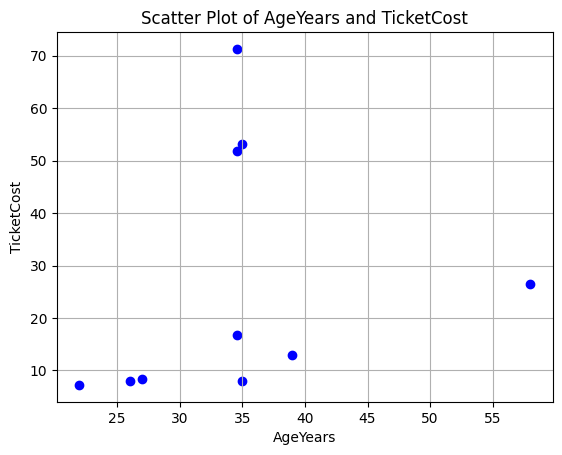

In [12]:
plt.scatter(df['AgeYears'],df['TicketCost'],color='Blue')
plt.title('Scatter Plot of AgeYears and TicketCost')
plt.xlabel('AgeYears')
plt.ylabel('TicketCost')
plt.grid(True)
plt.show()


In [14]:
from sklearn.preprocessing import MinMaxScaler

# Initialize the MinMaxScaler
scaler=MinMaxScaler()
df[['TicketCost', 'AgeYears']] = scaler.fit_transform (df [['TicketCost', 'AgeYears']])
df[['TicketCost', 'AgeYears']].head(10)

,TicketCost,AgeYears
0,0.000000,0.000000
1,1.000000,0.349206
2,0.010464,0.111111
3,0.716071,0.361111
4,0.012494,0.361111
5,0.018897,0.138889
6,0.696705,0.349206
7,0.147587,0.349206
8,0.301421,1.000000
9,0.089802,0.472222


In [15]:
# Remove irrelevant data
df.drop(columns=['TravelerName','BoardingPassNumber','SuiteNumber'], inplace=True)
df.head(10)

,PassengerID,CompletedTrip,CabinClass,Gender,AgeYears,FamilyOnBoard,Guardians,TicketCost,BoardingPort,TicketCost_zscore
0,1,0,Economy,male,0.000000,1,0,0.000000,ORD,-0.811906
1,2,1,First,female,0.349206,1,0,1.000000,JFK,1.900379
2,3,1,Economy,female,0.111111,0,0,0.010464,ORD,-0.783525
3,4,1,First,female,0.361111,1,0,0.716071,ORD,1.130281
4,5,0,Economy,male,0.361111,0,0,0.012494,ORD,-0.778019
5,6,0,Economy,male,0.138889,0,0,0.018897,LAX,-0.760651
6,7,0,First,male,0.349206,0,0,0.696705,ORD,1.077755
7,8,1,Economy,female,0.349206,1,1,0.147587,ORD,-0.411608
8,9,0,Business,female,1.000000,0,0,0.301421,ORD,0.005634
9,10,1,Economy,male,0.472222,0,0,0.089802,JFK,-0.568339


In [16]:
# FEATURE ENGINEERING

df['FamilySize']=df['FamilyOnBoard'] +df['Guardians']
df[['FamilyOnBoard', 'Guardians','FamilySize']].head(10)

,FamilyOnBoard,Guardians,FamilySize
0,1,0,1
1,1,0,1
2,0,0,0
3,1,0,1
4,0,0,0
5,0,0,0
6,0,0,0
7,1,1,2
8,0,0,0
9,0,0,0


In [17]:
# Data formatting

# convert 'Gender' column to number (1 or 0)
df['Gender']=df['Gender'].map({'male':0, 'female':1})
print(df)

   PassengerID  CompletedTrip CabinClass  Gender  AgeYears  FamilyOnBoard  \
0            1              0    Economy       0  0.000000              1   
1            2              1      First       1  0.349206              1   
2            3              1    Economy       1  0.111111              0   
3            4              1      First       1  0.361111              1   
4            5              0    Economy       0  0.361111              0   
5            6              0    Economy       0  0.138889              0   
6            7              0      First       0  0.349206              0   
7            8              1    Economy       1  0.349206              1   
8            9              0   Business       1  1.000000              0   
9           10              1    Economy       0  0.472222              0   

   Guardians  TicketCost BoardingPort  TicketCost_zscore  FamilySize  
0          0    0.000000          ORD          -0.811906           1  
1         